In [3]:
df = pd.read_csv("../data/reviews.csv")


In [4]:
df.shape


(71044, 25)

In [2]:
import pandas as pd

df.head()


In [9]:
df.columns


Index(['id', 'brand', 'categories', 'dateAdded', 'dateUpdated', 'ean', 'keys',
       'manufacturer', 'manufacturerNumber', 'name', 'reviews.date',
       'reviews.dateAdded', 'reviews.dateSeen', 'reviews.didPurchase',
       'reviews.doRecommend', 'reviews.id', 'reviews.numHelpful',
       'reviews.rating', 'reviews.sourceURLs', 'reviews.text', 'reviews.title',
       'reviews.userCity', 'reviews.userProvince', 'reviews.username', 'upc'],
      dtype='str')

df.isnull().sum().sort_values(ascending=False)


In [5]:
df.isnull().sum().sort_values(ascending=False)


reviews.userProvince    70595
reviews.userCity        65634
reviews.didPurchase     38886
reviews.id              38886
reviews.numHelpful      38536
ean                     31979
reviews.doRecommend     10615
reviews.title             477
manufacturerNumber        203
manufacturer              141
reviews.username          102
reviews.date               67
reviews.text               36
upc                         2
reviews.sourceURLs          0
reviews.rating              0
id                          0
brand                       0
reviews.dateAdded           0
name                        0
keys                        0
dateUpdated                 0
dateAdded                   0
categories                  0
reviews.dateSeen            0
dtype: int64

In [6]:
df["reviews.userCity"].nunique()


2282

In [7]:
df["reviews.userCity"].value_counts().head(10)


reviews.userCity
Chicago         68
New York        62
Houston         57
Los Angeles     56
Dallas          42
Atlanta         40
Miami           39
Philadelphia    38
San Diego       37
Pittsburgh      35
Name: count, dtype: int64

In [8]:
df["reviews.userCity"].notnull().sum()


np.int64(5410)

In [10]:
df["reviews.rating"].value_counts().sort_index()


reviews.rating
1     3701
2     1833
3     4369
4    14598
5    46543
Name: count, dtype: int64

In [11]:
def convert_rating_to_sentiment(rating):
    if rating<=2:
        return "negative"
    elif rating == 3:
        return "average"
    else:
        return "positive"
df["sentiment"] = df["reviews.rating"].apply(convert_rating_to_sentiment)

In [12]:
df["sentiment"].value_counts()


sentiment
positive    61141
negative     5534
average      4369
Name: count, dtype: int64

In [13]:
df["reviews.text"].sample(20).tolist()


['cannot live without it, use it for kitchen, stove, bathroom, bedrooms, just everything!',
 'Great tast and priced right',
 'A great romantic movie for a date night. Strongly recommended.',
 "I've been using this L'Oreal Revitalift Facial Moisturizer off and on for a couple weeks. Cons: It's pretty thick and leaves my skin a little shiny. Since I don't wear makeup, I've decided to only use this product before bed. Also I have sensitive skin, and the perfume in this product irritates me just a bit. Pros: It's made my skin softer and younger looking in just a short period of time in conjunction with the Revitalift Serum. I'm in my early thirties and it's helped with the lines that are beginning to show around my mouth and eyes. Overall, I recommend adding this product to your daily routine if you like thick moisturizers and don't mind a strong perfume. This review was collected as part of a promotion.",
 'This is a great product. It works well and keeps my room cool.',
 'we love clorox 

In [14]:
# Count rows containing promotion-related words
promotion_mask = df["reviews.text"].str.contains(
    r"\b(promote|promotion|promoted)\b",
    case=False,
    na=False,
    regex=True
)

promotion_count = promotion_mask.sum()
total_count = len(df)
non_promotion_count = total_count - promotion_count

promotion_count, non_promotion_count, total_count


/var/folders/49/mg93515n7x5f2ccm5br66f8h0000gn/T/ipykernel_6855/3618324477.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  promotion_mask = df["reviews.text"].str.contains(


(np.int64(17738), np.int64(53306), 71044)

In [15]:
promotion_mask = df["reviews.text"].str.contains(
    r"\b(?:promot|promotion|promoted)\b",
    case=False,
    na=False
)


In [16]:
df["reviews.text"] = df["reviews.text"].str.replace(
    r"This review was collected as part of a promotion\.?",
    "",
    case=False,
    regex=True
)


In [17]:
df["reviews.text"].sample(5).tolist()


['This is an amazing moisturizer if you are looking for something with anti-aging properties but for just a fraction of the cost of some of the ones on the market! Within weeks I noticed a more balanced and even skin tone and complexion. I also noted a reasonable improvement in the fine lines surrounding my eyes. And it is not too oily like many products I have tried previously. This one ranks high on my list!! I would highly recommend this effective AND affordable moisturizer to anyone I know. ',
 'This movie is hilariously funny...make sure to not watch around the kids.',
 'Bought this heater tonight, plugged it in for a good 5 minutes and my whole power went out! Shame.',
 'An entertaining action / comedy with a wealth of good actors.',
 'I put this movie in for my 2 year old and we watched it 3 times straight. Not only entertaining for him but for me also.']

In [18]:
df["sentiment"].value_counts()


sentiment
positive    61141
negative     5534
average      4369
Name: count, dtype: int64

In [19]:
import re

def clean_text(text):
    text = text.lower()
    text = re.sub(r"\s+", " ", text)  # remove extra whitespace
    text = text.strip()
    return text

df["clean_text"] = df["reviews.text"].apply(clean_text)


AttributeError: 'float' object has no attribute 'lower'

In [20]:
import re

In [21]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"\s+", " ", text)
    text = text.strip()
    return text

df["clean_text"] = df["reviews.text"].apply(clean_text)

AttributeError: 'float' object has no attribute 'lower'

In [22]:
df["reviews.text"] = df["reviews.text"].fillna("")


In [23]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"\s+", " ", text)
    text = text.strip()
    return text

df["clean_text"] = df["reviews.text"].apply(clean_text)

In [24]:
from sklearn.model_selection import train_test_split

X = df["clean_text"]
y = df["sentiment"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(
    max_features=10000,
    ngram_range=(1,2),
    min_df=5
)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)


In [26]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    max_iter=1000,
    class_weight='balanced'
)

model.fit(X_train_tfidf, y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",'balanced'
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :ter

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test_tfidf)

print(classification_report(y_test, y_pred))


Matplotlib is building the font cache; this may take a moment.


              precision    recall  f1-score   support

     average       0.27      0.62      0.38       874
    negative       0.59      0.78      0.67      1107
    positive       0.98      0.86      0.91     12228

    accuracy                           0.84     14209
   macro avg       0.61      0.75      0.66     14209
weighted avg       0.90      0.84      0.86     14209



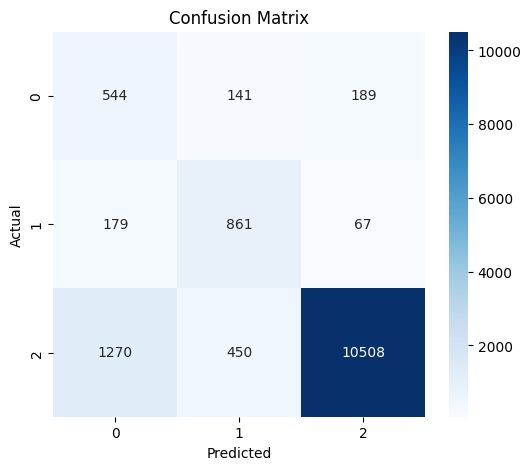

In [28]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [29]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

     average       0.27      0.62      0.38       874
    negative       0.59      0.78      0.67      1107
    positive       0.98      0.86      0.91     12228

    accuracy                           0.84     14209
   macro avg       0.61      0.75      0.66     14209
weighted avg       0.90      0.84      0.86     14209



In [30]:
all_text_tfidf = vectorizer.transform(df["clean_text"])
df["predicted_sentiment"] = model.predict(all_text_tfidf)


In [31]:
product_sentiment = (
    df.groupby("name")["predicted_sentiment"]
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
)

product_sentiment.head()


predicted_sentiment,average,negative,positive
name,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,0.833333,0.000000,0.166667
100:Complete First Season (blu-Ray),0.172662,0.021583,0.805755
12110209 - Honeywell Quietset 8-Speed Tower Fan Oscillating,0.176271,0.108475,0.715254
16ct Peppa Pig Lunch Napkins,0.000000,0.000000,1.000000
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,0.166667,0.000000,0.833333


In [32]:
df["name"].value_counts().head(10)


name
Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total                         8606
The Secret Life Of Pets (4k/uhd + Blu-Ray + Digital)                              5510
Independence Day Resurgence (4k/uhd + Blu-Ray + Digital)                          3609
Tide Original Liquid Laundry Detergent - 100 Oz                                   3498
Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd                   3330
Olay Total Effects Daily Moisturizer, 7-In-1 Anti-Aging, 0.5oz                    2766
The Jungle Book (blu-Ray/dvd + Digital)                                           2489
L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz    2288
L'oreal Paris Revitalift Triple Power Deep-Acting Moisturizer                     2286
Clorox Disinfecting Bathroom Cleaner                                              2093
Name: count, dtype: int64

In [33]:
df["name"].value_counts().loc[
    [
        "0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest",
        "100:Complete First Season (blu-Ray)",
        "12110209 - Honeywell Quietset 8-Speed Tower Fan Oscillating",
        "16ct Peppa Pig Lunch Napkins",
        "2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black"
    ]
]


name
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest          6
100:Complete First Season (blu-Ray)                                  139
12110209 - Honeywell Quietset 8-Speed Tower Fan Oscillating          295
16ct Peppa Pig Lunch Napkins                                           2
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black      6
Name: count, dtype: int64

In [34]:
review_counts = df["name"].value_counts()

valid_products = review_counts[review_counts > 50].index

product_sentiment = product_sentiment.loc[valid_products]


In [35]:
top_products = product_sentiment.sort_values(
    by="positive",
    ascending=False
)

top_products.head(10)


predicted_sentiment,average,negative,positive
name,,,
Rolling Stones - Let It Bleed (cd),0.015152,0.000000,0.984848
Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,0.011039,0.004299,0.984662
Clorox Disinfecting Bathroom Cleaner,0.015767,0.011945,0.972289
"Cream of Wheat Original 2 1/2 Minute, 28 Oz",0.017857,0.035714,0.946429
Chuggington: Let's Ride The Rails,0.037736,0.018868,0.943396
"Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",0.047619,0.012698,0.939683
Cinnamon Toast Crunch,0.047244,0.023622,0.929134
Quilted Northern Ultra Plush Toilet Paper - 18 Mega Rolls,0.030577,0.043780,0.925643
Bisquick Original Pancake And Baking Mix - 40oz,0.070707,0.010101,0.919192


In [36]:
product_sentiment["promotion_score"] = (
    product_sentiment["positive"]
    - product_sentiment["negative"]
)


In [37]:
product_sentiment.sort_values(
    by="promotion_score",
    ascending=False
).head(10)


predicted_sentiment,average,negative,positive,promotion_score
name,,,,
Rolling Stones - Let It Bleed (cd),0.015152,0.000000,0.984848,0.984848
Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,0.011039,0.004299,0.984662,0.980363
Clorox Disinfecting Bathroom Cleaner,0.015767,0.011945,0.972289,0.960344
"Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",0.047619,0.012698,0.939683,0.926984
Chuggington: Let's Ride The Rails,0.037736,0.018868,0.943396,0.924528
"Cream of Wheat Original 2 1/2 Minute, 28 Oz",0.017857,0.035714,0.946429,0.910714
Bisquick Original Pancake And Baking Mix - 40oz,0.070707,0.010101,0.919192,0.909091
Cinnamon Toast Crunch,0.047244,0.023622,0.929134,0.905512
Pulp Fiction (dvdvideo),0.063465,0.018868,0.917667,0.898799


In [38]:
top_product_name = "PUT_PRODUCT_NAME_HERE"

df[
    (df["name"] == top_product_name) &
    (df["predicted_sentiment"] == "positive")
]["reviews.text"].sample(10).tolist()


ValueError: a must be greater than 0 unless no samples are taken

In [39]:
counts = df["name"].value_counts()

for product in [
    "Rolling Stones - Let It Bleed (cd)",
    "Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total",
    "Clorox Disinfecting Bathroom Cleaner",
    "Cinnamon Toast Crunch",
    "Pulp Fiction (dvdvideo)"
]:
    print(product, "→", counts.get(product, 0))


Rolling Stones - Let It Bleed (cd) → 66
Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total → 8606
Clorox Disinfecting Bathroom Cleaner → 2093
Cinnamon Toast Crunch → 127
Pulp Fiction (dvdvideo) → 583


In [40]:
import numpy as np

In [41]:
feature_names = vectorizer.get_feature_names_out()

positive_index = list(model.classes_).index("positive")

top_positive_indices = np.argsort(model.coef_[positive_index])[-20:]

top_positive_words = feature_names[top_positive_indices]

top_positive_words

array(['would recommend', 'highly', 'lasts', 'not only', 'disappoint',
       'fresh', 'classic', 'love this', 'perfect', 'amazing', 'awesome',
       'just as', 'easy', 'clorox', 'excellent', 'soft', 'wonderful',
       'clean', 'love', 'great'], dtype=object)

In [42]:
clorox_positive = df[
    (df["name"] == "Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total") &
    (df["predicted_sentiment"] == "positive")
]["clean_text"]


In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

subset_vectorizer = TfidfVectorizer(
    max_features=1000,
    ngram_range=(1,2),
    stop_words='english'
)

subset_matrix = subset_vectorizer.fit_transform(clorox_positive)

subset_feature_names = subset_vectorizer.get_feature_names_out()

subset_scores = subset_matrix.sum(axis=0)

top_indices = np.argsort(subset_scores.A1)[-20:]

subset_feature_names[top_indices]


array(['using', 'quick', 'love clorox', 'disinfecting', 'smell',
       'bathroom', 'convenient', 'kitchen', 'easy use', 'house',
       'cleaning', 'clorox wipes', 'easy', 'product', 'great', 'clean',
       'clorox', 'wipes', 'love', 'use'], dtype=object)

In [44]:
risky_products = product_sentiment.sort_values(
    by="negative",
    ascending=False
)

risky_products.head(10)


predicted_sentiment,average,negative,positive,promotion_score
name,,,,
Nexxus Exxtra Gel Style Creation Sculptor,0.007082,0.939093,0.053824,-0.885269
"Maybelline Eye Studio Master Duo Glossy Liquid Liner, Black Lacquer",0.073394,0.697248,0.229358,-0.467890
Rubbermaid174 Reveal Spray Mop,0.133058,0.617329,0.249613,-0.367715
Clear Scalp & Hair Therapy Total Care Nourishing Shampoo,0.055703,0.602122,0.342175,-0.259947
"L'oreal Paris Voluminous Extra-Volume Collagen Mascara, Black Brown",0.093333,0.520000,0.386667,-0.133333
"Maybelline Great Lash Lots Of Lashes Washable Mascara, Very Black",0.067797,0.432203,0.500000,0.067797
Oxiclean Laundry Stain Remover Spray,0.065217,0.427536,0.507246,0.079710
Nexxus Promend Heat Protexx Heat Protection Styling Spray,0.119403,0.417910,0.462687,0.044776
"Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz",0.089172,0.414013,0.496815,0.082803


In [45]:
risky_product = "Nexxus Exxtra Gel Style Creation Sculptor"

negative_reviews = df[
    (df["name"] == risky_product) &
    (df["predicted_sentiment"] == "negative")
]["clean_text"]


In [46]:
subset_vectorizer = TfidfVectorizer(
    max_features=1000,
    ngram_range=(1,2),
    stop_words='english'
)

subset_matrix = subset_vectorizer.fit_transform(negative_reviews)

feature_names = subset_vectorizer.get_feature_names_out()

scores = subset_matrix.sum(axis=0)

top_indices = scores.A1.argsort()[-20:]

feature_names[top_indices]


array(['smell', 'changed', 'exxtra', 'change', 'using', 'bring old',
       'new formula', 'like', 'nexxus', 'hold', 'bring', 'used', 'years',
       'old formula', 'hair', 'new', 'old', 'product', 'gel', 'formula'],
      dtype=object)

In [47]:
df["name"].value_counts().get(
    "Nexxus Exxtra Gel Style Creation Sculptor", 0
)


np.int64(706)

In [48]:
df["name"].value_counts().get(
    "Maybelline Eye Studio Master Duo Glossy Liquid Liner", 0
)

0

In [49]:
risky_product = "Maybelline Eye Studio Master Duo Glossy Liquid Liner"

negative_reviews = df[
    (df["name"] == risky_product) &
    (df["predicted_sentiment"] == "negative")
]["clean_text"]


In [50]:
subset_vectorizer = TfidfVectorizer(
    max_features=1000,
    ngram_range=(1,2),
    stop_words='english'
)

subset_matrix = subset_vectorizer.fit_transform(negative_reviews)

feature_names = subset_vectorizer.get_feature_names_out()

scores = subset_matrix.sum(axis=0)

top_indices = scores.A1.argsort()[-20:]

feature_names[top_indices]


ValueError: empty vocabulary; perhaps the documents only contain stop words

In [51]:
df["name"].str.contains("Maybelline Eye Studio", case=False, na=False).sum()


np.int64(356)

In [52]:
df[df["name"].str.contains("Maybelline Eye Studio", case=False, na=False)]["name"].value_counts()


name
Maybelline Eye Studio Color Plush Shadow Quad, Gutsy Green              246
Maybelline Eye Studio Master Duo Glossy Liquid Liner, Black Lacquer     109
Maybelline Eye Studio Master Duo Glossy Liquid Liner, Polished Green      1
Name: count, dtype: int64

In [53]:
risky_product = "Maybelline Eye Studio Color Plush Shadow Quad, Gutsy Green"

negative_reviews = df[
    (df["name"] == risky_product) &
    (df["predicted_sentiment"] == "negative")
]["clean_text"]

len(negative_reviews)


46

In [54]:
subset_vectorizer = TfidfVectorizer(
    max_features=1000,
    ngram_range=(1,2),
    stop_words='english'
)

subset_matrix = subset_vectorizer.fit_transform(negative_reviews)

feature_names = subset_vectorizer.get_feature_names_out()

scores = subset_matrix.sum(axis=0)

top_indices = scores.A1.argsort()[-20:]

feature_names[top_indices]


array(['case', 'shipping', 'package', 'money', 'like', 'came broken',
       'disappointed', 'box', 'color', 'powder', 'eye shadow',
       'eyeshadow', 'shadow', 'came', 'received', 'eye', 'arrived',
       'colors', 'product', 'broken'], dtype=object)

In [55]:
decision_df = pd.DataFrame({
    "Product": [
        "Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total",
        "Nexxus Exxtra Gel Style Creation Sculptor",
        "Maybelline Eye Studio Color Plush Shadow Quad, Gutsy Green"
    ],
    
    "Sentiment Summary": [
        "Extremely high positive sentiment (~98%) across 8600+ reviews",
        "Severe negative sentiment (~94%) across 700+ reviews",
        "High negative sentiment driven by damaged deliveries"
    ],
    
    "Root Cause": [
        "Customers trust cleaning effectiveness and convenience",
        "Customer backlash after formula change",
        "Fragile packaging leading to broken products"
    ],
    
    "Business Action": [
        "Increase promotion and marketing",
        "Investigate formula change urgently",
        "Improve packaging / shipping protection"
    ]
})

decision_df


,Product,Sentiment Summary,Root Cause,Business Action
0,Clorox Disinfecting Wipes Value Pack Scented 1...,Extremely high positive sentiment (~98%) acros...,Customers trust cleaning effectiveness and con...,Increase promotion and marketing
1,Nexxus Exxtra Gel Style Creation Sculptor,Severe negative sentiment (~94%) across 700+ r...,Customer backlash after formula change,Investigate formula change urgently
2,"Maybelline Eye Studio Color Plush Shadow Quad,...",High negative sentiment driven by damaged deli...,Fragile packaging leading to broken products,Improve packaging / shipping protection


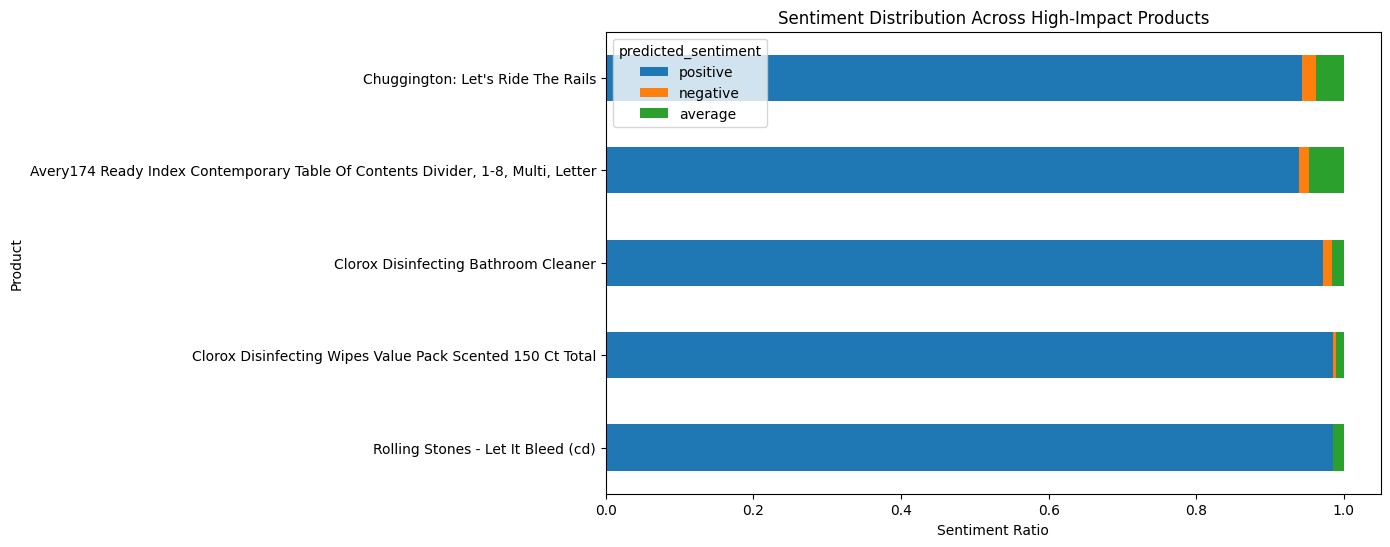

In [56]:
top_products = product_sentiment.loc[
    product_sentiment.sum(axis=1).sort_values(ascending=False).index
].head(5)

top_products[["positive","negative","average"]].plot(
    kind="barh",
    stacked=True,
    figsize=(10,6)
)

plt.title("Sentiment Distribution Across High-Impact Products")
plt.xlabel("Sentiment Ratio")
plt.ylabel("Product")
plt.show()


In [57]:
product_summary = df.groupby("name").agg(
    review_count=("predicted_sentiment", "count"),
    positive_ratio=("predicted_sentiment", lambda x: (x=="positive").mean()),
    negative_ratio=("predicted_sentiment", lambda x: (x=="negative").mean()),
    average_ratio=("predicted_sentiment", lambda x: (x=="average").mean())
)

product_summary["promotion_score"] = (
    product_summary["positive_ratio"]
    - product_summary["negative_ratio"]
)

product_summary = product_summary.sort_values(
    by="promotion_score",
    ascending=False
)

product_summary.head()


,review_count,positive_ratio,negative_ratio,average_ratio,promotion_score
name,,,,,
"bareMinerals Original Foundation Broad Spectrum Spf 15, Medium",2,1.0,0.0,0.0,1.0
La Tortilla Factory Hand Made Style Tortillas Flour,1,1.0,0.0,0.0,1.0
Isoplus Oil Sheen Hair Spray,2,1.0,0.0,0.0,1.0
J. Hunt Bold Table Lamp,3,1.0,0.0,0.0,1.0
"J.R. Watkins Hand Cream, Lemon Cream",6,1.0,0.0,0.0,1.0


In [58]:

product_summary.tail()

,review_count,positive_ratio,negative_ratio,average_ratio,promotion_score
name,,,,,
Newman's Own Beef & Broccoli Complete Skillet Meal,1,0.0,1.0,0.0,-1.0
Dremel VC490 Velocity Universal Panel Cutting Blade,1,0.0,1.0,0.0,-1.0
Ecotrin Pain Reliever Regular Strength 325mg Tablets - Aspirin (nsaid) - 300ct,1,0.0,1.0,0.0,-1.0
Udi's Pepperoni Pizza,1,0.0,1.0,0.0,-1.0
"No-Ad Sport Continuous Spray Sunblock, SPF 30",1,0.0,1.0,0.0,-1.0


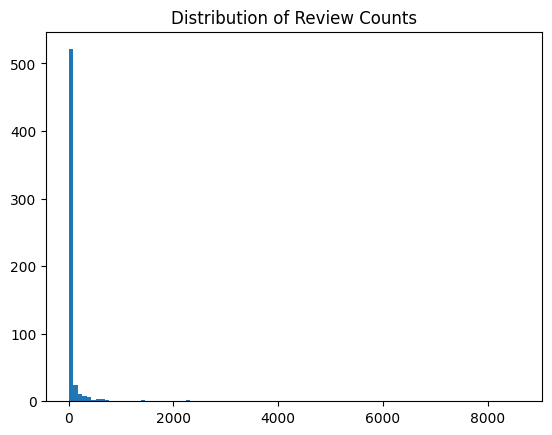

In [59]:
import matplotlib.pyplot as plt

plt.hist(product_summary["review_count"], bins=100)
plt.title("Distribution of Review Counts")
plt.show()


In [60]:
product_summary["review_count"].describe()


count     600.000000
mean      118.406667
std       554.044002
min         1.000000
25%         2.000000
50%         8.000000
75%        31.000000
max      8606.000000
Name: review_count, dtype: float64

In [61]:
product_summary["confidence"] = product_summary["review_count"].apply(
    lambda x: "High" if x >= 50 else "Low"
)


In [62]:
high_confidence_products = product_summary[
    product_summary["review_count"] >= 50
]


In [63]:
low_confidence_products = product_summary[
    product_summary["review_count"] < 50
]


In [64]:
product_summary["confidence"].value_counts()


confidence
Low     488
High    112
Name: count, dtype: int64

In [65]:
def decide_action(row):

    if row["confidence"] == "Low":
        return "Collect More Reviews"

    if row["promotion_score"] >= 0.6:
        return "Promote Aggressively"

    elif row["promotion_score"] >= 0.3:
        return "Promote"

    elif row["promotion_score"] <= -0.4:
        return "Investigate Urgently"

    elif row["promotion_score"] <= -0.2:
        return "Monitor Closely"

    else:
        return "Stable"


product_summary["business_action"] = product_summary.apply(decide_action, axis=1)


In [66]:
product_summary["business_action"].value_counts()


business_action
Collect More Reviews    488
Promote Aggressively     68
Promote                  26
Stable                   14
Monitor Closely           2
Investigate Urgently      2
Name: count, dtype: int64

In [67]:
product_summary[
    product_summary["business_action"] == "Promote Aggressively"
].sort_values(by="promotion_score", ascending=False).head(10)


,review_count,positive_ratio,negative_ratio,average_ratio,promotion_score,confidence,business_action
name,,,,,,,
Rolling Stones - Let It Bleed (cd),66,0.984848,0.000000,0.015152,0.984848,High,Promote Aggressively
Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,8606,0.984662,0.004299,0.011039,0.980363,High,Promote Aggressively
Clorox Disinfecting Bathroom Cleaner,2093,0.972289,0.011945,0.015767,0.960344,High,Promote Aggressively
"Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",315,0.939683,0.012698,0.047619,0.926984,High,Promote Aggressively
Chuggington: Let's Ride The Rails,53,0.943396,0.018868,0.037736,0.924528,High,Promote Aggressively
"Cream of Wheat Original 2 1/2 Minute, 28 Oz",56,0.946429,0.035714,0.017857,0.910714,High,Promote Aggressively
Bisquick Original Pancake And Baking Mix - 40oz,99,0.919192,0.010101,0.070707,0.909091,High,Promote Aggressively
Cinnamon Toast Crunch,127,0.929134,0.023622,0.047244,0.905512,High,Promote Aggressively
Pulp Fiction (dvdvideo),583,0.917667,0.018868,0.063465,0.898799,High,Promote Aggressively


In [68]:
product_summary[
    product_summary["business_action"] == "Investigate Urgently"
].sort_values(by="promotion_score").head(10)


,review_count,positive_ratio,negative_ratio,average_ratio,promotion_score,confidence,business_action
name,,,,,,,
Nexxus Exxtra Gel Style Creation Sculptor,706,0.053824,0.939093,0.007082,-0.885269,High,Investigate Urgently
"Maybelline Eye Studio Master Duo Glossy Liquid Liner, Black Lacquer",109,0.229358,0.697248,0.073394,-0.467890,High,Investigate Urgently


In [69]:
elite_recommendations = product_summary[
    (product_summary["review_count"] >= 200) &
    (product_summary["promotion_score"] >= 0.7)
].sort_values(by="promotion_score", ascending=False)

elite_recommendations


,review_count,positive_ratio,negative_ratio,average_ratio,promotion_score,confidence,business_action
name,,,,,,,
Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,8606,0.984662,0.004299,0.011039,0.980363,High,Promote Aggressively
Clorox Disinfecting Bathroom Cleaner,2093,0.972289,0.011945,0.015767,0.960344,High,Promote Aggressively
"Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",315,0.939683,0.012698,0.047619,0.926984,High,Promote Aggressively
Pulp Fiction (dvdvideo),583,0.917667,0.018868,0.063465,0.898799,High,Promote Aggressively
The Jungle Book (blu-Ray/dvd + Digital),2489,0.906388,0.011651,0.081961,0.894737,High,Promote Aggressively
The Secret Life Of Pets (4k/uhd + Blu-Ray + Digital),5510,0.897459,0.011797,0.090744,0.885662,High,Promote Aggressively
Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd),1144,0.895979,0.010490,0.093531,0.885490,High,Promote Aggressively
Quilted Northern Ultra Plush Toilet Paper - 18 Mega Rolls,1439,0.925643,0.043780,0.030577,0.881862,High,Promote Aggressively
The Resident Evil Collection 5 Discs (blu-Ray),847,0.876033,0.015348,0.108619,0.860685,High,Promote Aggressively


In [70]:
executive_summary = product_summary[[
    "review_count",
    "positive_ratio",
    "negative_ratio",
    "promotion_score",
    "business_action"
]].sort_values(by="promotion_score", ascending=False)

executive_summary.head(20)


,review_count,positive_ratio,negative_ratio,promotion_score,business_action
name,,,,,
"bareMinerals Original Foundation Broad Spectrum Spf 15, Medium",2,1.0,0.0,1.0,Collect More Reviews
Physician's Formula Cheek Palette Cream-to-Powder Blush Rose Palette,1,1.0,0.0,1.0,Collect More Reviews
Suave Kids Berry Body Wash,6,1.0,0.0,1.0,Collect More Reviews
One Grace Place Teyo's Tires Round Rug - Black (5x5'),3,1.0,0.0,1.0,Collect More Reviews
Ore International Table Lamp - Brown,2,1.0,0.0,1.0,Collect More Reviews
Ore International Table Lamp - Silver,2,1.0,0.0,1.0,Collect More Reviews
Stonyfield Yobaby Peach & Pear Yogurt 4oz 6 Ct,1,1.0,0.0,1.0,Collect More Reviews
Pacific Natural Foods Organic Beef Broth,1,1.0,0.0,1.0,Collect More Reviews
"Palladio Rice Paper, Translucent",1,1.0,0.0,1.0,Collect More Reviews


In [71]:
vectorizer = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1,2),
    min_df=5,
    max_df=0.85,
    sublinear_tf=True,
    stop_words="english"
)

X_tfidf = vectorizer.fit_transform(df["clean_text"])

In [72]:
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf,
    df["sentiment"],
    test_size=0.2,
    random_state=42,
    stratify=df["sentiment"]
)

In [73]:
log_model = LogisticRegression(
    max_iter=1000,
    class_weight="balanced"
)

log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)


In [75]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_log))

Logistic Regression Accuracy: 0.791329439087902

Classification Report:

              precision    recall  f1-score   support

     average       0.21      0.57      0.30       874
    negative       0.53      0.75      0.62      1107
    positive       0.97      0.81      0.88     12228

    accuracy                           0.79     14209
   macro avg       0.57      0.71      0.60     14209
weighted avg       0.89      0.79      0.83     14209



In [76]:
from sklearn.svm import LinearSVC

svm_model = LinearSVC(class_weight="balanced")

svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)


In [77]:
print("Linear SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred_svm))


Linear SVM Accuracy: 0.8764867337602927

Classification Report:

              precision    recall  f1-score   support

     average       0.31      0.40      0.35       874
    negative       0.64      0.72      0.68      1107
    positive       0.95      0.93      0.94     12228

    accuracy                           0.88     14209
   macro avg       0.64      0.68      0.66     14209
weighted avg       0.89      0.88      0.88     14209



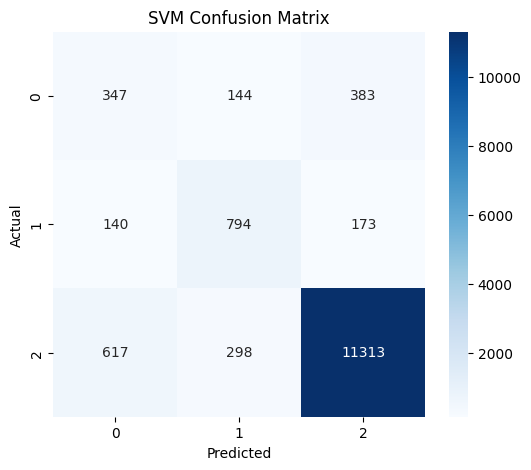

In [78]:
cm = confusion_matrix(y_test, y_pred_svm)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM Confusion Matrix")
plt.show()


In [79]:
comparison = {
    "Model": ["Logistic Regression", "Linear SVM"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_log),
        accuracy_score(y_test, y_pred_svm)
    ]
}

comparison

{'Model': ['Logistic Regression', 'Linear SVM'],
 'Accuracy': [0.791329439087902, 0.8764867337602927]}

In [80]:
df["predicted_sentiment_logistic"] = y_pred_log_full


NameError: name 'y_pred_log_full' is not defined

In [81]:
X_full = vectorizer.transform(df["clean_text"])


In [82]:
y_pred_log_full = log_model.predict(X_full)

df["predicted_sentiment_logistic"] = y_pred_log_full


In [83]:
y_pred_svm_full = svm_model.predict(X_full)

df["predicted_sentiment_svm"] = y_pred_svm_full


In [84]:
df[[
    "predicted_sentiment_logistic",
    "predicted_sentiment_svm"
]].head()


,predicted_sentiment_logistic,predicted_sentiment_svm
0,average,positive
1,positive,positive
2,positive,positive
3,negative,negative
4,negative,negative


In [85]:
product_summary_svm = (
    df.groupby("name")
    .agg(
        review_count=("predicted_sentiment_svm", "count"),
        positive_ratio=("predicted_sentiment_svm", lambda x: (x=="positive").mean()),
        negative_ratio=("predicted_sentiment_svm", lambda x: (x=="negative").mean()),
        average_ratio=("predicted_sentiment_svm", lambda x: (x=="average").mean())
    )
)

product_summary_svm["promotion_score"] = (
    product_summary_svm["positive_ratio"]
    - product_summary_svm["negative_ratio"]
)

product_summary_svm = product_summary_svm.sort_values(
    by="promotion_score",
    ascending=False
)


In [86]:
product_summary_svm["confidence"] = product_summary_svm["review_count"].apply(
    lambda x: "High" if x >= 50 else "Low"
)


In [87]:
def business_action(row):
    if row["confidence"] == "Low":
        return "Collect More Reviews"
    elif row["promotion_score"] > 0.5:
        return "Promote Aggressively"
    elif row["promotion_score"] < -0.3:
        return "Investigate Urgently"
    else:
        return "Monitor"

product_summary_svm["business_action"] = product_summary_svm.apply(
    business_action, axis=1
)


In [88]:
executive_summary_svm = product_summary_svm[[
    "review_count",
    "positive_ratio",
    "negative_ratio",
    "promotion_score",
    "confidence",
    "business_action"
]].sort_values(by="promotion_score", ascending=False)

executive_summary_svm.head(20)


,review_count,positive_ratio,negative_ratio,promotion_score,confidence,business_action
name,,,,,,
"bareMinerals Original Foundation Broad Spectrum Spf 15, Medium",2,1.0,0.0,1.0,Low,Collect More Reviews
Coola Organic Sunscreen Classic Face Cucumber SPF 30,2,1.0,0.0,1.0,Low,Collect More Reviews
"Ben & Jerry's Coffee, Coffee Buzzbuzzbuzz! Ice Cream, Pint",11,1.0,0.0,1.0,Low,Collect More Reviews
Sizzix Framelits Dies 1by Tim Holtz Bird Crazy-Silver Asst Sizes,18,1.0,0.0,1.0,Low,Collect More Reviews
"Sloan Royal Urinal Flush Valve, 1.0 Gpf, Royal 186-1",1,1.0,0.0,1.0,Low,Collect More Reviews
Bicycle Shower Curtain (72x72) Blue/cream,3,1.0,0.0,1.0,Low,Collect More Reviews
Wilton Black Dots Standard Baking Cups,1,1.0,0.0,1.0,Low,Collect More Reviews
Bill Glor Gaither - Church In The Wildwood (cd),3,1.0,0.0,1.0,Low,Collect More Reviews
Who Is Harry Nilsson (and Why Is Ever (dvd),1,1.0,0.0,1.0,Low,Collect More Reviews


In [89]:
executive_summary_svm[
    executive_summary_svm["business_action"] == "Promote Aggressively"
].head(10)


,review_count,positive_ratio,negative_ratio,promotion_score,confidence,business_action
name,,,,,,
Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,8606,0.993261,0.002789,0.990472,High,Promote Aggressively
Rolling Stones - Let It Bleed (cd),66,0.984848,0.000000,0.984848,High,Promote Aggressively
"Smead174 Hanging File Folders, 1/5 Tab, 11 Point Stock, Letter, Navy, 25/box",113,0.982301,0.000000,0.982301,High,Promote Aggressively
Clorox Disinfecting Bathroom Cleaner,2093,0.985667,0.007167,0.978500,High,Promote Aggressively
Softsoap Body Butter Scrub Coconut and Jojoba Butter Body Wash,82,0.975610,0.000000,0.975610,High,Promote Aggressively
"Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",315,0.974603,0.000000,0.974603,High,Promote Aggressively
Star Trek:Original Series Season One (dvd),70,0.971429,0.000000,0.971429,High,Promote Aggressively
Sopranos:Season 6 Part 1 (blu-Ray),68,0.970588,0.014706,0.955882,High,Promote Aggressively
Planes: Fire Rescue (2 Discs) (includes Digital Copy) (blu-Ray/dvd),1144,0.958916,0.004371,0.954545,High,Promote Aggressively


In [90]:
executive_summary_svm[
    executive_summary_svm["business_action"] == "Investigate Urgently"
].head(10)


,review_count,positive_ratio,negative_ratio,promotion_score,confidence,business_action
name,,,,,,
"Maybelline Eye Studio Master Duo Glossy Liquid Liner, Black Lacquer",109,0.284404,0.688073,-0.403670,High,Investigate Urgently
Nexxus Exxtra Gel Style Creation Sculptor,706,0.069405,0.924929,-0.855524,High,Investigate Urgently


In [91]:
product_summary_logistic = (
    df.groupby("name")
    .agg(
        review_count=("predicted_sentiment_logistic", "count"),
        positive_ratio=("predicted_sentiment_logistic", lambda x: (x=="positive").mean()),
        negative_ratio=("predicted_sentiment_logistic", lambda x: (x=="negative").mean()),
    )
)

product_summary_logistic["promotion_score"] = (
    product_summary_logistic["positive_ratio"]
    - product_summary_logistic["negative_ratio"]
)

promotion_diff = (
    product_summary_svm["promotion_score"]
    - product_summary_logistic["promotion_score"]
).abs().sort_values(ascending=False)

promotion_diff.head(15)


name
Newman's Own Beef & Broccoli Complete Skillet Meal                      2.0
Clorox Ultimate Care Premium Bleach                                     2.0
Organic Root Stimulator Tea Tree Oil Anti-Bump Lotion                   2.0
Wet N Wild Megalast Lip Color, Dollhouse Pink 967                       2.0
Black Opal Total Coverage Spot & Scar Eraser, Hazelnut                  2.0
Crystal Key Table Lamp - Safavieh174                                    2.0
Southern Enterprises Archer Fold-Away Home Bar in Walnut                2.0
Physician's Formula Cheek Palette Cream-to-Powder Blush Rose Palette    2.0
Lucy's Sugar Cookies, 5.5oz                                             2.0
Hugo Naturals Medium Hold Styling Gel                                   1.2
Cococare 100% Natural Castor Oil                                        1.0
Simply Ruffles Sea Salted Reduced Fat* Potato Chips - 8oz               1.0
Alera174 Genaro Series Guest Chair, Black Leather, Sled Base            1.0
Scunci 

In [92]:
promotion_diff = (
    product_summary_svm["promotion_score"]
    - product_summary_logistic["promotion_score"]
).abs().sort_values(ascending=False)

high_risk_products = promotion_diff[promotion_diff >= 1]

high_risk_products.head(20)


name
Newman's Own Beef & Broccoli Complete Skillet Meal                      2.0
Clorox Ultimate Care Premium Bleach                                     2.0
Organic Root Stimulator Tea Tree Oil Anti-Bump Lotion                   2.0
Wet N Wild Megalast Lip Color, Dollhouse Pink 967                       2.0
Black Opal Total Coverage Spot & Scar Eraser, Hazelnut                  2.0
Crystal Key Table Lamp - Safavieh174                                    2.0
Southern Enterprises Archer Fold-Away Home Bar in Walnut                2.0
Physician's Formula Cheek Palette Cream-to-Powder Blush Rose Palette    2.0
Lucy's Sugar Cookies, 5.5oz                                             2.0
Hugo Naturals Medium Hold Styling Gel                                   1.2
Cococare 100% Natural Castor Oil                                        1.0
Simply Ruffles Sea Salted Reduced Fat* Potato Chips - 8oz               1.0
Alera174 Genaro Series Guest Chair, Black Leather, Sled Base            1.0
Scunci 

In [96]:
def risk_label(diff):
    if diff >= 1:
        return "High Model Disagreement"
    elif diff >= 0.5:
        return "Moderate Disagreement"
    else:
        return "Stable Prediction"

model_risk_table = promotion_diff.to_frame("promotion_diff")
model_risk_table["risk_level"] = model_risk_table["promotion_diff"].apply(risk_label)

model_risk_table.head(40)


,promotion_diff,risk_level
name,,
Newman's Own Beef & Broccoli Complete Skillet Meal,2.000000,High Model Disagreement
Clorox Ultimate Care Premium Bleach,2.000000,High Model Disagreement
Organic Root Stimulator Tea Tree Oil Anti-Bump Lotion,2.000000,High Model Disagreement
"Wet N Wild Megalast Lip Color, Dollhouse Pink 967",2.000000,High Model Disagreement
"Black Opal Total Coverage Spot & Scar Eraser, Hazelnut",2.000000,High Model Disagreement
Crystal Key Table Lamp - Safavieh174,2.000000,High Model Disagreement
Southern Enterprises Archer Fold-Away Home Bar in Walnut,2.000000,High Model Disagreement
Physician's Formula Cheek Palette Cream-to-Powder Blush Rose Palette,2.000000,High Model Disagreement
"Lucy's Sugar Cookies, 5.5oz",2.000000,High Model Disagreement


In [97]:
final_decision_table = executive_summary_svm.copy()

final_decision_table["model_disagreement"] = promotion_diff
final_decision_table["risk_level"] = final_decision_table["model_disagreement"].apply(risk_label)

final_decision_table.head(20)


,review_count,positive_ratio,negative_ratio,promotion_score,confidence,business_action,model_disagreement,risk_level
name,,,,,,,,
"bareMinerals Original Foundation Broad Spectrum Spf 15, Medium",2,1.0,0.0,1.0,Low,Collect More Reviews,0.000000,Stable Prediction
Coola Organic Sunscreen Classic Face Cucumber SPF 30,2,1.0,0.0,1.0,Low,Collect More Reviews,0.000000,Stable Prediction
"Ben & Jerry's Coffee, Coffee Buzzbuzzbuzz! Ice Cream, Pint",11,1.0,0.0,1.0,Low,Collect More Reviews,0.181818,Stable Prediction
Sizzix Framelits Dies 1by Tim Holtz Bird Crazy-Silver Asst Sizes,18,1.0,0.0,1.0,Low,Collect More Reviews,0.166667,Stable Prediction
"Sloan Royal Urinal Flush Valve, 1.0 Gpf, Royal 186-1",1,1.0,0.0,1.0,Low,Collect More Reviews,0.000000,Stable Prediction
Bicycle Shower Curtain (72x72) Blue/cream,3,1.0,0.0,1.0,Low,Collect More Reviews,0.666667,Moderate Disagreement
Wilton Black Dots Standard Baking Cups,1,1.0,0.0,1.0,Low,Collect More Reviews,0.000000,Stable Prediction
Bill Glor Gaither - Church In The Wildwood (cd),3,1.0,0.0,1.0,Low,Collect More Reviews,0.333333,Stable Prediction
Who Is Harry Nilsson (and Why Is Ever (dvd),1,1.0,0.0,1.0,Low,Collect More Reviews,0.000000,Stable Prediction


In [98]:
viz_df = final_decision_table[
    final_decision_table["confidence"] == "High"
]


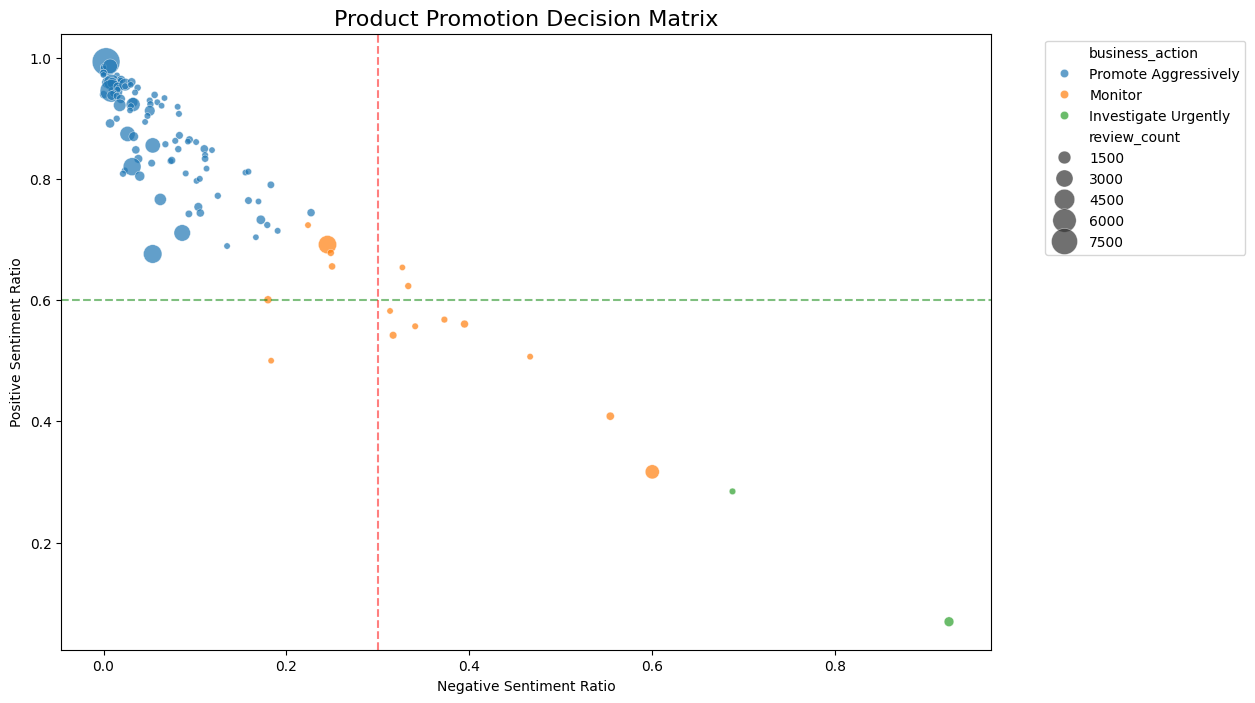

In [100]:
plt.figure(figsize=(12,8))

sns.scatterplot(
    data=viz_df,
    x="negative_ratio",
    y="positive_ratio",
    hue="business_action",
    size="review_count",
    sizes=(20,400),
    alpha=0.7
)

plt.title("Product Promotion Decision Matrix", fontsize=16)
plt.xlabel("Negative Sentiment Ratio")
plt.ylabel("Positive Sentiment Ratio")

plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.axhline(0.6, linestyle="--", color="green", alpha=0.5)
plt.axvline(0.3, linestyle="--", color="red", alpha=0.5)

plt.show()


In [101]:
bubble_df = final_decision_table[
    final_decision_table["confidence"] == "High"
].copy()


In [102]:
bubble_df["promotion_score"] = (
    bubble_df["positive_ratio"] - bubble_df["negative_ratio"]
)


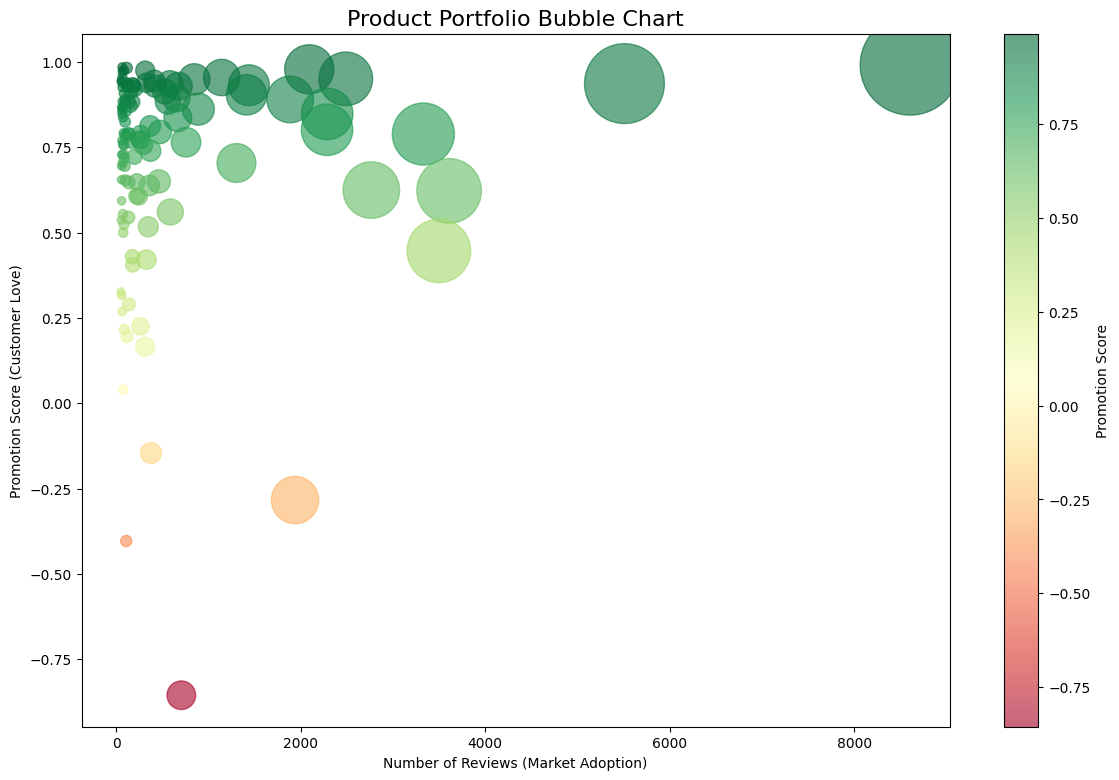

In [ ]:
plt.figure(figsize=(14,9))

scatter = plt.scatter(
    bubble_df["review_count"],
    bubble_df["promotion_score"],
    s=bubble_df["review_count"] * 0.6,
    c=bubble_df["promotion_score"],
    cmap="RdYlGn",
    alpha=0.6
)

plt.xscale("log")  # 🔥 Important upgrade

plt.colorbar(label="Promotion Score")

plt.xlabel("Number of Reviews (Log Scale)")
plt.ylabel("Promotion Score (Customer Love)")
plt.title("Product Portfolio Bubble Chart (Log Scaled)", fontsize=16)

plt.axhline(0, linestyle="--")  # Neutral line
plt.show()
